In [1]:
%matplotlib inline
import xgboost as xgb
import pandas as pd
import numpy as np

/home/jiashen/env3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train_adjusted.csv')
test = pd.read_csv('test.csv')

In [3]:
label = np.log(train['price_doc']+1)
col = list(test.columns)[2:]

In [4]:
cat = []
for each in col:
    if train[each].dtype == 'object' or 'ID' in each:
        train[each] = pd.factorize(train[each], sort=True)[0]
        test[each]=pd.factorize(test[each], sort=True)[0]
        cat.append(each)

In [5]:
def normalize(col):
    mean = np.nanmean(x_all[col])
    std = np.nanstd(x_all[col])
    return [(each - mean)/std if np.isnan(each)!=True else np.nan for each in list(x_all[col])]

In [6]:
def standarize(col):
    min_v = np.nanmin(x_all[col])
    max_v = np.nanmax(x_all[col])
    return [(each - min_v)/(max_v-min_v) if np.isnan(each)!=True else np.nan for each in list(x_all[col])]

In [7]:
num_train = train.shape[0]

In [8]:
x_all = pd.concat([train,test])

In [ ]:
con_var = [each for each in col if each not in cat]
for each in con_var:
    x_all[each] = standarize(each)

In [ ]:
for each in con_var:
    x_all[each] = normalize(each)

In [32]:
train = x_all.iloc[:num_train,:]
test = x_all.iloc[num_train:,:]

In [36]:
dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

In [37]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

[0]	train-rmse:14.427	test-rmse:14.427
[50]	train-rmse:1.16264	test-rmse:1.16658
[100]	train-rmse:0.320732	test-rmse:0.345938
[150]	train-rmse:0.294783	test-rmse:0.330706
[200]	train-rmse:0.284295	test-rmse:0.329076
[250]	train-rmse:0.275861	test-rmse:0.328672
[300]	train-rmse:0.268339	test-rmse:0.328622
Performance does not improve from 290 rounds


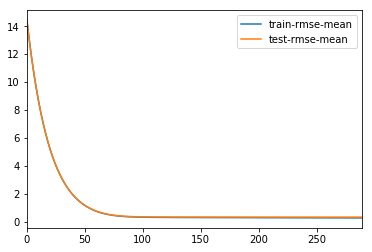

In [38]:
xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [ ]:

#[200]	train-rmse:0.283933	test-rmse:0.329064
#[250]	train-rmse:0.275325	test-rmse:0.328806

#[250]	train-rmse:0.275861	test-rmse:0.328672
#[300]	train-rmse:0.268339	test-rmse:0.328622
#Performance does not improve from 290 rounds